---------------OR----------------------
[INFO] training perceptron...
Learning Rate: 0.9025162235344292
Learning Rate: 0.21826714130887115
Learning Rate: 0.041480891008809806
Learning Rate: 0.7998530523277588
Learning Rate: 0.3752301304659664


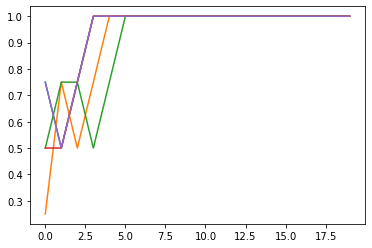

[INFO] testing perceptron...
[INFO] data=[0 0], ground-truth=0, pred=0
[INFO] data=[0 1], ground-truth=1, pred=1
[INFO] data=[1 0], ground-truth=1, pred=1
[INFO] data=[1 1], ground-truth=1, pred=1
---------------AND----------------------
[INFO] training perceptron...
Learning Rate: 0.6927143227638625
Learning Rate: 0.711096462174933
Learning Rate: 0.5180635778871857
Learning Rate: 0.006273169403615664
Learning Rate: 0.48101139146846217


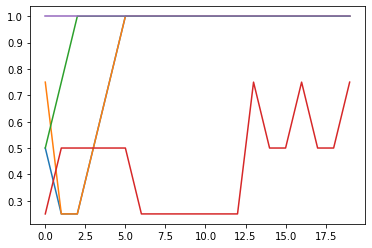

[INFO] testing perceptron...
[INFO] data=[0 0], ground-truth=0, pred=0
[INFO] data=[0 1], ground-truth=0, pred=0
[INFO] data=[1 0], ground-truth=0, pred=0
[INFO] data=[1 1], ground-truth=1, pred=1


In [9]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

class Perceptron:
    def __init__(self, N, alpha=0.1):
        # initialize the weight matrix and store the learning rate
        self.W=[]
        for i in range(N+1):
            self.W.append(round(random.uniform(-0.3, 0.3), 2))
        self.alpha = alpha

    def step(self, x):
        # apply the step function
        return 1 if x > 0 else 0

    def fit(self, X, y, epochs=10):
        acc=[]
        # insert a column of 1's as the last entry in the feature
        # matrix -- this little trick allows us to treat the bias
        # as a trainable parameter within the weight matrix
        X = np.c_[X, np.ones((X.shape[0]))]

        # loop over the desired number of epochs
        for epoch in np.arange(0, epochs):
            costs=[]
            # loop over each individual data point
            for (x, target) in zip(X, y):
                # take the dot product between the input features
                # and the weight matrix, then pass this value
                # through the step function to obtain the prediction
                p = self.step(np.dot(x, self.W))
                # only perform a weight update if our prediction
                # does not match the target
                if p != target:
                    # determine the error
                    error = p - target
                    # update the weight matrix
                    delta = -self.alpha * error * x
                    self.W += delta
                    
                costs.append(p)
        
            acc.append(accuracy_score(np.array(y), np.array(costs)))
        return acc

    def predict(self, X, addBias=True):
        # ensure our input is a matrix
        X = np.atleast_2d(X)
        # check to see if the bias column should be added
        if addBias:
            # insert a column of 1's as the last entry in the feature
            # matrix (bias)
            X = np.c_[X, np.ones((X.shape[0]))]
        # take the dot product between the input features and the
        # weight matrix, then pass the value through the step
        # function
        return self.step(np.dot(X, self.W))

# construct the OR dataset
print("---------------OR----------------------")
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [1]])
# define our perceptron and train it
print("[INFO] training perceptron...")

for i in range(5):
    # initialize learning rate
    alpha = random.random()
    print("Learning Rate: " + str(alpha))
    p = Perceptron(X.shape[1], alpha=alpha)
    costs = p.fit(X, y, epochs=20)
    plt.plot(costs)

plt.show()

# now that our perceptron is trained we can evaluate it
print("[INFO] testing perceptron...")
# now that our network is trained, loop over the data points
for (x, target) in zip(X, y):
    # make a prediction on the data point and display the result
    # to our console
    pred = p.predict(x)
    print("[INFO] data={}, ground-truth={}, pred={}".format(
        x, target[0], pred))


# construct the AND dataset
print("---------------AND----------------------")
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [0], [0], [1]])
# define our perceptron and train it
print("[INFO] training perceptron...")


for i in range(5):
    #initialize learning rate
    alpha = random.random()
    print("Learning Rate: " + str(alpha))
    p = Perceptron(X.shape[1], alpha=alpha)
    costs = p.fit(X, y, epochs=20)
    plt.plot(costs)

plt.show()

# now that our perceptron is trained we can evaluate it
print("[INFO] testing perceptron...")
# now that our network is trained, loop over the data points
for (x, target) in zip(X, y):
    # make a prediction on the data point and display the result
    # to our console
    pred = p.predict(x)
    print("[INFO] data={}, ground-truth={}, pred={}".format(x, target[0], pred))